In [1]:
# Importando as bibliotecas
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Criando a rotina para utilizar o dataset Iris
iris = datasets.load_iris()

In [3]:
# Converte o dataset Iris para o formato dataframe

df_iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                       columns = iris['feature_names'] + ['target'])

In [4]:
print(df_iris.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


In [5]:
# Transformando os dados em array

x = df_iris.iloc[:, :-1].values # Dados de entrada
y = df_iris.iloc[:, 4].values # Dados de saídas ou target

In [6]:
# Realizando a divisão dos dados entre treino e teste

from sklearn.model_selection import train_test_split # Função que realiza a divisão do dataset
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20) # 20% para teste

In [7]:
# Realizando o processo de normalização dos dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Objeto que normaliza os dados
scaler.fit(x_treino) # Realiza a normalização dos dados

x_treino = scaler.transform(x_treino)
x_teste = scaler.transform(x_teste)

In [10]:
# Treinando o modelo

from sklearn.neighbors import KNeighborsClassifier
classificador = KNeighborsClassifier(n_neighbors = 5) # Hiperparâmetro definido: 5 vizinhos
classificador.fit(x_treino, y_treino) # Aplicando a classificação

KNeighborsClassifier()

In [11]:
# Realizando a previsão

y_pred = classificador.predict(x_teste)

In [12]:
# Construindo a matriz de confusão para comparar o modelo criado

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_teste, y_pred))
print(classification_report(y_teste, y_pred))

[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       1.00      0.90      0.95        10
         2.0       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



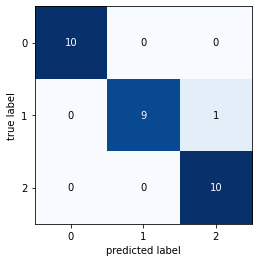

In [15]:
# Realizando o plot da matriz de confusão

matriz_confusao = confusion_matrix(y_teste, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()